In [301]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumSquare') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.font_manager._rebuild()

Matplotlib is building the font cache; this may take a moment.


In [394]:
# 데이터 불러오기
train=pd.read_csv("content/movies_train.csv")
test=pd.read_csv("content/movies_test.csv")
submission=pd.read_csv("content/submission.csv")

In [395]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [396]:
train.shape

(600, 12)

In [397]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [398]:
# distributor
data = train[["distributor", "box_off_num"]].groupby(["distributor"]).median()
data.sort_values(by = ['box_off_num'],ascending = False)[:10]

,box_off_num
distributor,
CJ E&M Pictures,4122337.0
(주)아이필름코퍼레이션,3117859.0
쇼박스(주)미디어플렉스,2634823.0
영구아트무비,2541603.0
CJ E&M 영화부문,2242510.0
(주)쇼박스,2138560.0
이십세기폭스코리아(주),1422844.0
SK텔레콤(주),1383867.0
전망좋은영화사,1214237.0


In [399]:
dist=data.sort_values(by = ['box_off_num'],ascending = True).reset_index()
dist["dist"]=[i + 1 for i in range(dist.shape[0])]
dist=dist[["distributor", "dist"]]
dist

,distributor,dist
0,인피니티엔터테인먼트,1
1,고구마공작소,2
2,사람과 사람들,3
3,위드시네마,4
4,나우콘텐츠,5
5,한국YWCA연합회,6
6,인터콘미디어,7
7,위더스필름,8
8,(주)씨엠닉스,9
9,건시네마,10


In [400]:
train = pd.merge(train, dist, how = 'left')
test = pd.merge(test, dist, how = 'left')

In [401]:
test["dist"].fillna(0,inplace=True)

In [402]:
# genre
data = train[["genre", "box_off_num"]].groupby(["genre"]).median()
data.sort_values(by = ['box_off_num'],ascending = False)[:10]

,box_off_num
genre,
느와르,1646142.0
액션,1147846.5
코미디,210775.0
공포,179810.0
서스펜스,82611.0
애니메이션,23802.0
SF,9323.0
드라마,7173.0
뮤지컬,4778.0


In [403]:
# screening_rat
data = train[["screening_rat", "box_off_num"]].groupby(["screening_rat"]).median()
data.sort_values(by = ['box_off_num'],ascending = False)[:10]

,box_off_num
screening_rat,
15세 관람가,242381.0
12세 관람가,19323.0
전체 관람가,8325.0
청소년 관람불가,3008.5


- distributor, genre, screening_rat 별로 관객 수 차이가 다르게 나타남

In [404]:

train=pd.get_dummies(train, columns=['genre', 'screening_rat'])
test=pd.get_dummies(test, columns=['genre', 'screening_rat'])

In [405]:
train.shape

(600, 27)

In [406]:
test.shape

(243, 26)

In [407]:
# 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
train["dir_prev_bfnum"]

0             NaN
1      1161602.50
2       220775.25
3        23894.00
4            1.00
          ...    
595       3833.00
596     496061.00
597           NaN
598           NaN
599           NaN
Name: dir_prev_bfnum, Length: 600, dtype: float64

In [408]:
train[train['dir_prev_bfnum'].isna()].head()

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,개들의 전쟁,롯데엔터테인먼트,2012-11-22,96,조병옥,NaN,0,91,2,23398,...,0,0,0,0,1,0,0,0,0,1
6,길위에서,백두대간,2013-05-23,104,이창재,NaN,0,32,5,53526,...,0,0,0,0,0,0,0,0,1,0
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,2014-09-18,129,정성복,NaN,0,3,5,4778,...,1,0,0,0,0,0,0,0,1,0
9,청춘그루브,(주)두타연,2012-03-15,94,변성현,NaN,0,138,3,868,...,0,0,0,0,0,0,0,1,0,0
10,AV 아이돌,(주) 케이알씨지,2015-07-27,89,조조 히데오,NaN,0,0,4,745,...,0,0,0,0,0,0,0,0,0,1


In [409]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

- 감독의 이전작품이 존재 하지 않을 때 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [410]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time']=pd.to_datetime(train['release_time'])

In [411]:
test['dir_prev_bfnum'].fillna(0, inplace=True)
test['release_time']=pd.to_datetime(test['release_time'])

In [412]:
test.isna().sum()

title                     0
distributor               0
release_time              0
time                      0
director                  0
dir_prev_bfnum            0
dir_prev_num              0
num_staff                 0
num_actor                 0
dist                      0
genre_SF                  0
genre_공포                  0
genre_느와르                 0
genre_다큐멘터리               0
genre_드라마                 0
genre_멜로/로맨스              0
genre_뮤지컬                 0
genre_미스터리                0
genre_서스펜스                0
genre_애니메이션               0
genre_액션                  0
genre_코미디                 0
screening_rat_12세 관람가     0
screening_rat_15세 관람가     0
screening_rat_전체 관람가      0
screening_rat_청소년 관람불가    0
dtype: int64

<AxesSubplot:>

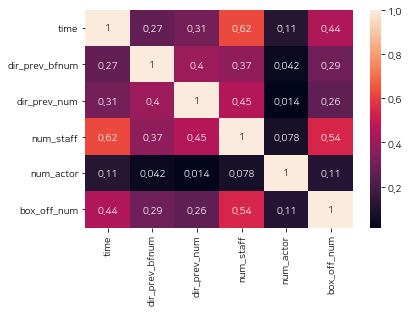

In [413]:
corr = train[["time", "dir_prev_bfnum", "dir_prev_num", "num_staff", "num_actor", "box_off_num"]].corr()
sns.heatmap(corr, annot=True)

## 모델링

In [414]:
X_train=train.drop(columns=['title','distributor' , 'director',  'box_off_num'], axis=1)
y_train=train["box_off_num"]
final_test = test.drop(columns=['title', 'distributor','director'], axis=1)

In [415]:
X_train.drop(columns=["release_time"], axis=1, inplace=True)
final_test.drop(columns=["release_time"], axis=1, inplace=True)

In [416]:
final_test.isna().sum()

time                      0
dir_prev_bfnum            0
dir_prev_num              0
num_staff                 0
num_actor                 0
dist                      0
genre_SF                  0
genre_공포                  0
genre_느와르                 0
genre_다큐멘터리               0
genre_드라마                 0
genre_멜로/로맨스              0
genre_뮤지컬                 0
genre_미스터리                0
genre_서스펜스                0
genre_애니메이션               0
genre_액션                  0
genre_코미디                 0
screening_rat_12세 관람가     0
screening_rat_15세 관람가     0
screening_rat_전체 관람가      0
screening_rat_청소년 관람불가    0
dtype: int64

In [417]:
# scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.2, random_state = 2021)

sc= scaler.fit_transform(X_train[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']])
ar = np.array(X_train[['dist', 'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가']])
X_train = np.c_[sc, ar] # 배열을 칼럼으로 붙이기

sc= scaler.transform(X_val[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']])
ar = np.array(X_val[['dist', 'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가']])
X_val = np.c_[sc, ar] # 배열을 칼럼으로 붙이기

## RandomForestRegressor

In [418]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
rf = RandomForestRegressor( n_estimators=1000,random_state = 2021)
params = {'max_depth' : [5,10,15],
          'min_samples_split' : [2,3,4]}
reg = GridSearchCV(rf, param_grid=params ,cv = 5)

In [419]:
reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=2021),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 3, 4]})

In [461]:
reg.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [421]:
rf = RandomForestRegressor(max_depth=5, min_samples_split=4, n_estimators=1000,random_state=2021)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=4, n_estimators=1000,
                      random_state=2021)

In [422]:
from sklearn.metrics import mean_squared_error
rf_pred = rf.predict(X_val)
mse = mean_squared_error(y_val, rf_pred)
rmse = np.sqrt(mse)
rmse

1342791.8601981162

## ExtraTreesRegressor

In [458]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(random_state = 2021)
params = {
    'n_estimators' : [100,500,1000],
    'max_depth' : [3,5,10,15],
         'min_samples_split' : [2,3,4]}
reg2 = GridSearchCV(et, param_grid=params ,cv = 5)

In [459]:
reg2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=2021),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 500, 1000]})

In [466]:
reg2.best_params_,reg2.best_estimator_

({'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100},
 ExtraTreesRegressor(max_depth=5, random_state=2021))

In [434]:
et = ExtraTreesRegressor(max_depth=5, min_samples_split=2, n_estimators=100, random_state = 2021)
et.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5, min_samples_split=4, random_state=2021)

In [435]:
et_pred = et.predict(X_val)
mse = mean_squared_error(y_val, et_pred)
rmse = np.sqrt(mse)
rmse

1252410.7234575585

## XGBRegressor

In [464]:
from xgboost import XGBRegressor
xgb = XGBRegressor (random_state = 2021)
params = {
     'n_estimators' : [100,500,1000],
    'learning_rate' : [0.001,0.01,0.1,0.5],
           'max_depth':[3,5,10]
}
reg3=GridSearchCV(xgb, param_grid=params, cv=5)
reg3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=2021,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [468]:
reg3.best_params_, reg3.best_estimator_

({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))

In [432]:
xgb = XGBRegressor(max_depth=3, learning_rate=0.001, n_estimators=1000, random_state = 2021)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [433]:
xgb_pred = xgb.predict(X_val)
mse = mean_squared_error(y_val, xgb_pred)
rmse = np.sqrt(mse)
rmse

1349130.4021659798

In [469]:
estimators = [reg2.best_estimator_,reg3.best_estimator_]
Estimators = [
    #("RF", reg.best_estimator_),
    ("ET", reg2.best_estimator_),
    ("XGB", reg3.best_estimator_),
]

In [477]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
Voting_clf = VotingRegressor(Estimators)
Voting_clf.fit(X_train, y_train)

Stacking_reg = StackingRegressor(estimators = Estimators,cv = 5)

In [478]:
Stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('ET',
                               ExtraTreesRegressor(max_depth=5,
                                                   random_state=2021)),
                              ('XGB',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_e

In [479]:
y_pred = Stacking_reg.predict(X_test)
submission['box_off_num'] = y_pred
submission.to_csv("7pro.csv", index = False)

In [471]:
y_pred = Voting_clf.predict(X_test)
submission['box_off_num'] = y_pred
submission.to_csv("6pro.csv", index = False)
#mse = mean_squared_error(y_pred, y_val)
#rmse = np.sqrt(mse)
#rmse

## 최종예측

In [446]:
X_train=train.drop(columns=['title','distributor' , 'director',  'box_off_num'], axis=1)
y_train=train["box_off_num"]
final_test = test.drop(columns=['title', 'distributor','director'], axis=1)
X_train.drop(columns=["release_time"], axis=1, inplace=True)
final_test.drop(columns=["release_time"], axis=1, inplace=True)

In [447]:
sc= scaler.fit_transform(X_train[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']])
ar = np.array(X_train[['dist', 'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가']])
X_train = np.c_[sc, ar] # 배열을 칼럼으로 붙이기

sc= scaler.transform(final_test[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']])
ar = np.array(final_test[['dist', 'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가']])
X_test = np.c_[sc, ar] # 배열을 칼럼으로 붙이기

Voting_final = VotingRegressor(Estimators)
Voting_final.fit(X_train, y_train)

y_final = Voting_final.predict(X_test)

In [462]:
et = ExtraTreesRegressor(n_estimators = 100,max_depth=5, min_samples_split=2, random_state = 2021)
et.fit(X_train, y_train)
y = et.predict(X_test)
submission['box_off_num'] = y
submission.to_csv("5pro.csv", index = False)